# Predicting The Stanley Cup Champion of 2023

## <p style="text-align: right;"> &#9989; Trevor Locknane, Ritik Jain, Jacob Brandt, Lucas Reath</p>

In [1]:
#imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# reading in the csv file made with the stats of NHL teams in the playoffs as of 4/4/2023
df = pd.read_csv('NHL_Standings23.csv', header=0, error_bad_lines=False)
east = df[df['Conference']=='Eastern']
west = df[df['Conference']=='Western']

east.head()

,Rank,Conference,Team,Games Played,Wins,Losses,OT Losses,Points,Points/GP,Goals For,Goals Against,Goal Differential,GF/GP,GA/GP,GD/GP,Power Play %,Penalty Kill %,Save %
0,1,Eastern,Boston Bruins,77,60,12,5,125,1.623,286,166,120,3.71,2.16,1.558,22.3,86.9,93.12
1,2,Eastern,Carolina Hurricanes,76,49,18,9,107,1.408,248,196,52,3.26,2.58,0.684,20.5,84.0,90.73
2,3,Eastern,New Jersey Devils,77,48,21,8,104,1.351,266,216,50,3.45,2.81,0.649,21.4,82.0,90.67
4,5,Eastern,New York Rangers,77,45,21,11,101,1.312,261,207,54,3.39,2.69,0.701,22.8,80.8,91.22
5,6,Eastern,Toronto Maple Leafs,76,45,21,10,100,1.316,258,211,47,3.39,2.78,0.618,25.7,80.5,91.00


In [3]:
west.head()

,Rank,Conference,Team,Games Played,Wins,Losses,OT Losses,Points,Points/GP,Goals For,Goals Against,Goal Differential,GF/GP,GA/GP,GD/GP,Power Play %,Penalty Kill %,Save %
3,4,Western,Vegas Golden Knights,77,48,22,7,103,1.338,257,220,37,3.34,2.86,0.481,20.7,77.5,91.43
6,7,Western,Los Angeles Kings,77,45,22,10,100,1.299,266,242,24,3.45,3.14,0.312,25.3,75.7,89.14
7,8,Western,Edmonton Oilers,77,45,23,9,99,1.286,306,254,52,3.97,3.30,0.675,32.4,76.1,90.06
8,9,Western,Dallas Stars,77,42,21,14,98,1.273,267,213,54,3.47,2.77,0.701,24.0,83.2,91.48
9,10,Western,Minnesota Wild,77,44,23,10,98,1.273,232,209,23,3.01,2.71,0.299,21.7,81.3,91.96


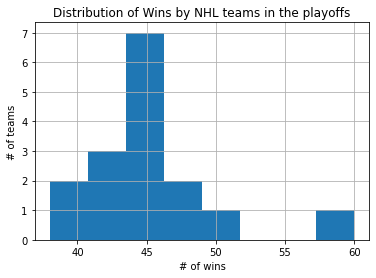

In [4]:
plt.hist(df['Wins'], bins=8)
plt.xlabel('# of wins')
plt.ylabel('# of teams')
plt.title('Distribution of Wins by NHL teams in the playoffs')
plt.grid()

### 10-Year Historical Data of Champions

- This data will be used to find the winning characteristics of past champions.
- Using past data a prediction will be made for the 2022 champion.
- Once confirmed we are predicting correctly we will apply this to 2023 where we can not yet test.
**file is still called 5Y, however there is now 10 years of data**

In [5]:
historical_champs_10Y_df = pd.read_csv('historical_nhl_champions_5Y.csv')
winning_teams = historical_champs_10Y_df[historical_champs_10Y_df['Team'] != 'League Average']
league_averages = historical_champs_10Y_df[historical_champs_10Y_df['Team'] == 'League Average']
historical_champs_10Y_df

,Year,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,PPOA,PK%,SH,SHA,S,S%,SA,SV%,PDO,SO
0,2022,Colorado Avalanche,28.2,82,56,19,7,119,0.726,308,...,236,79.66,6,5,2874,10.7,2625,0.912,101.2,7
1,2022,League Average,28.2,82,41,32,9,91,0.555,255,...,237,79.39,7,7,2593,9.8,2593,0.902,NaN,4
2,2021,Tampa Bay Lightning,28.4,56,36,17,3,75,0.670,180,...,183,84.15,3,3,1692,10.6,1583,0.908,100.8,6
3,2021,League Average,28.1,56,28,22,6,62,0.556,162,...,162,80.22,4,4,1678,9.7,1678,0.903,NaN,4
4,2020,Tampa Bay Lightning,27.7,70,43,21,6,92,0.657,243,...,231,81.39,6,7,2176,11.2,2165,0.910,101.9,4
5,2020,League Average,27.9,70,35,27,8,78,0.558,208,...,208,79.97,6,6,2192,9.5,2192,0.905,NaN,4
6,2019,St. Louis Blues,28.0,82,45,28,9,99,0.604,244,...,232,81.47,5,7,2604,9.4,2345,0.906,100.2,9
7,2019,League Average,27.9,82,41,32,9,91,0.553,244,...,239,80.22,8,8,2579,9.5,2579,0.905,NaN,5
8,2018,Washington Capitals,28.4,82,49,26,7,105,0.640,256,...,269,80.30,4,8,2379,10.8,2613,0.909,101.4,3
9,2018,League Average,28.0,82,41,31,10,92,0.558,240,...,250,79.82,7,7,2620,9.2,2620,0.908,NaN,5


## Plotting Historical Data (finding good indicators)

#### Winning Teams vs League Average Wins and Losses

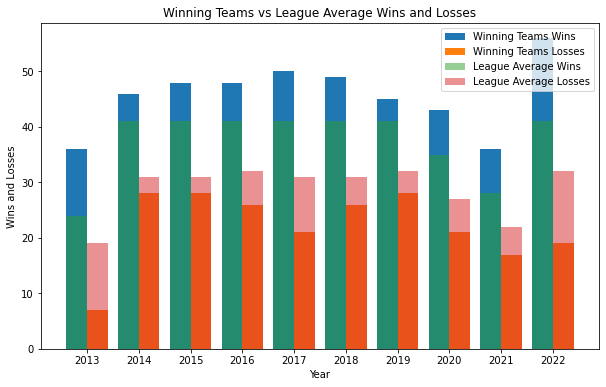

In [6]:
plt.figure(figsize=(10, 6))

# Plot Champion 
plt.bar(winning_teams['Year'], winning_teams['W'], width=-0.4, align='edge', label='Winning Teams Wins')
plt.bar(winning_teams['Year'], winning_teams['L'], width=0.4, align='edge', label='Winning Teams Losses')

# Plot League Average
plt.bar(league_averages['Year'], league_averages['W'], width=-0.4, align='edge', alpha=0.5, label='League Average Wins')
plt.bar(league_averages['Year'], league_averages['L'], width=0.4, align='edge', alpha=0.5, label='League Average Losses')

plt.xticks(winning_teams['Year'])
plt.xlabel('Year')
plt.ylabel('Wins and Losses')
plt.title('Winning Teams vs League Average Wins and Losses')
plt.legend()


#### Save Percentage of Winning Teams vs League Average
- Both the average and winning teams SV% are decreasing over time
- Every winning team in the last 10 years has had a higher SV% than the league average

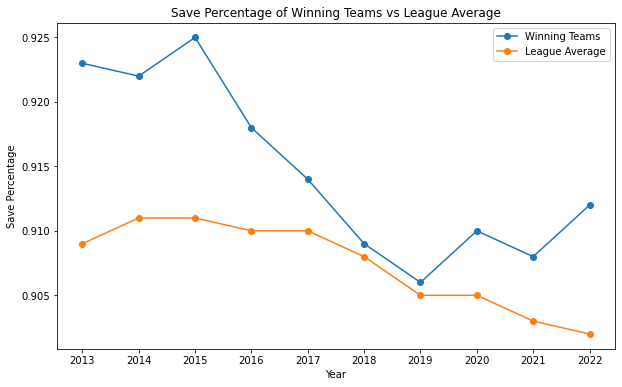

In [7]:
plt.figure(figsize=(10, 6))

plt.plot(winning_teams['Year'], winning_teams['SV%'], marker='o', label='Winning Teams')
plt.plot(league_averages['Year'], league_averages['SV%'], marker='o', label='League Average')

plt.xticks(winning_teams['Year'])
plt.xlabel('Year')
plt.ylabel('Save Percentage')
plt.title('Save Percentage of Winning Teams vs League Average')
plt.legend()


#### Power Play Percentage of Winning Teams vs League Average
- PP% has increased in champions over time and appears to be an important indicator now
- Winning teams PP% has increased steadily over time

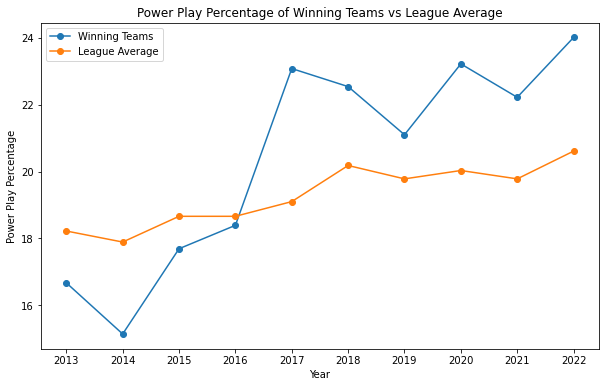

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(winning_teams['Year'], winning_teams['PP%'], marker='o', label='Winning Teams')
plt.plot(league_averages['Year'], league_averages['PP%'], marker='o', label='League Average')

plt.xticks(winning_teams['Year'])
plt.xlabel('Year')
plt.ylabel('Power Play Percentage')
plt.title('Power Play Percentage of Winning Teams vs League Average')
plt.legend()

#### Penalty Kill Percentage of Winning Teams vs League Average
- Appears all except one years champion had a higher PK% than league average, however 2018 and 2022 are close too

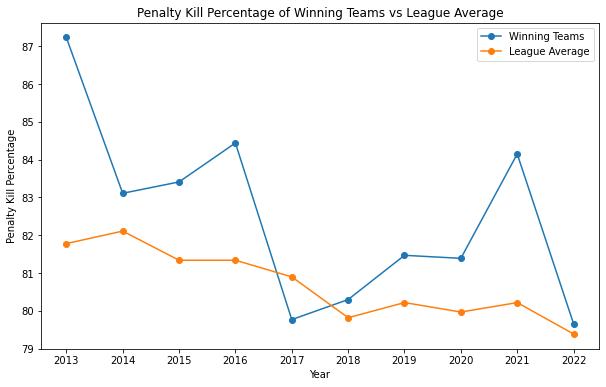

In [9]:
plt.figure(figsize=(10, 6))

plt.plot(winning_teams['Year'], winning_teams['PK%'], marker='o', label='Winning Teams')
plt.plot(league_averages['Year'], league_averages['PK%'], marker='o', label='League Average')

plt.xticks(winning_teams['Year'])
plt.xlabel('Year')
plt.ylabel('Penalty Kill Percentage')
plt.title('Penalty Kill Percentage of Winning Teams vs League Average')
plt.legend()

#### Goals Against of Winning Teams vs League Average
- The winning teams have had a lower goals against all years except 1 comapred to average

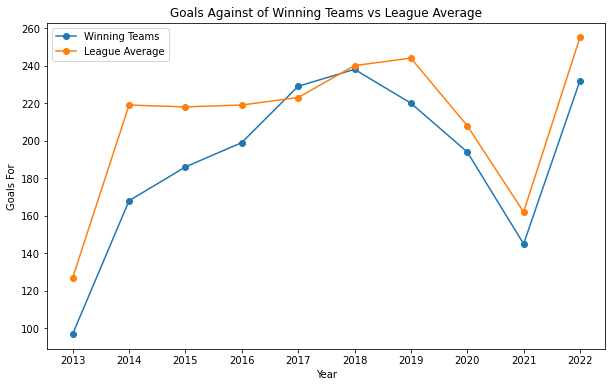

In [10]:
plt.figure(figsize=(10, 6))

plt.plot(winning_teams['Year'], winning_teams['GA'], marker='o', label='Winning Teams')
plt.plot(league_averages['Year'], league_averages['GA'], marker='o', label='League Average')

plt.xticks(winning_teams['Year'])
plt.xlabel('Year')
plt.ylabel('Goals For')
plt.title('Goals Against of Winning Teams vs League Average')
plt.legend()

#### Wins of Winning Teams vs League Average

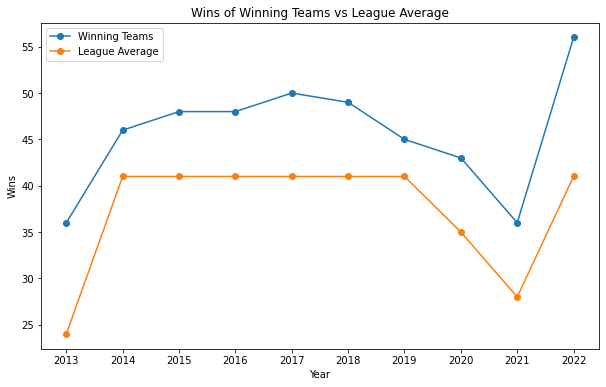

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(winning_teams['Year'], winning_teams['W'], marker='o', label='Winning Teams')
plt.plot(league_averages['Year'], league_averages['W'], marker='o', label='League Average')

plt.xticks(winning_teams['Year'])
plt.xlabel('Year')
plt.ylabel('Wins')
plt.title('Wins of Winning Teams vs League Average')
plt.legend()

Above is just a start of a couple indicators I found were significant for various reasons

## Filtering out teams
- Will filter teams out of 2022 end of regular season data based on predictors

In [12]:
season_2022_df = pd.read_csv('2022_season_stats.csv', header = 1)
season_2022_df = season_2022_df.rename(columns={'Unnamed: 1': 'Team'})
season_2022_df

,Rk,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
0,1.0,Florida Panthers*,27.8,82,58,18,6,122,0.744,337,...,79.54,12,8,10.1,10.8,3062,11.0,2515,0.904,5
1,2.0,Colorado Avalanche*,28.2,82,56,19,7,119,0.726,308,...,79.66,6,5,9.0,10.4,2874,10.7,2625,0.912,7
2,3.0,Carolina Hurricanes*,28.3,82,54,20,8,116,0.707,277,...,88.04,4,3,9.2,7.7,2798,9.9,2310,0.913,6
3,4.0,Toronto Maple Leafs*,28.4,82,54,21,7,115,0.701,312,...,82.05,13,4,8.6,8.5,2835,11.0,2511,0.900,7
4,5.0,Minnesota Wild*,29.4,82,53,22,7,113,0.689,305,...,76.14,2,5,10.8,10.8,2666,11.4,2577,0.903,3
5,6.0,Calgary Flames*,28.8,82,50,21,11,111,0.677,291,...,83.20,7,3,9.1,8.6,2908,10.0,2374,0.913,11
6,7.0,Tampa Bay Lightning*,29.6,82,51,23,8,110,0.671,285,...,80.56,7,5,11.0,11.4,2535,11.2,2441,0.907,3
7,8.0,New York Rangers*,26.7,82,52,24,6,110,0.671,250,...,82.30,8,2,8.2,8.2,2392,10.5,2528,0.919,9
8,9.0,St. Louis Blues*,28.8,82,49,22,11,109,0.665,309,...,84.09,9,5,7.5,7.9,2492,12.4,2591,0.908,4
9,10.0,Boston Bruins*,28.5,82,51,26,5,107,0.652,253,...,81.30,5,6,9.9,9.4,2962,8.5,2354,0.907,4


#### Removing Teams where:
- PK% < League Avg
- SV% < League Avg
- GA > League Avg
- PP% < League Avg
- W < League Avg

In [13]:
season_2022_df['PK%'] = season_2022_df['PK%'].astype(float)
season_2022_df['SV%'] = season_2022_df['SV%'].astype(float)
season_2022_df['PP%'] = season_2022_df['PP%'].astype(float)

league_avg_PKpct = season_2022_df.loc[season_2022_df['Team'] == 'League Average', 'PK%'].values[0]
league_avg_SVpct = season_2022_df.loc[season_2022_df['Team'] == 'League Average', 'SV%'].values[0]
league_avg_GA = season_2022_df.loc[season_2022_df['Team'] == 'League Average', 'GA'].values[0]
league_avg_PPpct = season_2022_df.loc[season_2022_df['Team'] == 'League Average', 'PP%'].values[0]
league_avg_W = season_2022_df.loc[season_2022_df['Team'] == 'League Average', 'W'].values[0]

filtered_df = season_2022_df[(season_2022_df['PK%'] > league_avg_PKpct) & (season_2022_df['Team'] != 'League Average')]
filtered_df = season_2022_df[(season_2022_df['SV%'] > league_avg_SVpct) & (season_2022_df['Team'] != 'League Average')]
filtered_df = season_2022_df[(season_2022_df['GA'] < league_avg_GA) & (season_2022_df['Team'] != 'League Average')]
filtered_df = season_2022_df[(season_2022_df['PP%'] > league_avg_PPpct) & (season_2022_df['Team'] != 'League Average')]
filtered_df = season_2022_df[(season_2022_df['W'] > league_avg_W) & (season_2022_df['Team'] != 'League Average')]

filtered_df


,Rk,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
0,1.0,Florida Panthers*,27.8,82,58,18,6,122,0.744,337,...,79.54,12,8,10.1,10.8,3062,11.0,2515,0.904,5
1,2.0,Colorado Avalanche*,28.2,82,56,19,7,119,0.726,308,...,79.66,6,5,9.0,10.4,2874,10.7,2625,0.912,7
2,3.0,Carolina Hurricanes*,28.3,82,54,20,8,116,0.707,277,...,88.04,4,3,9.2,7.7,2798,9.9,2310,0.913,6
3,4.0,Toronto Maple Leafs*,28.4,82,54,21,7,115,0.701,312,...,82.05,13,4,8.6,8.5,2835,11.0,2511,0.900,7
4,5.0,Minnesota Wild*,29.4,82,53,22,7,113,0.689,305,...,76.14,2,5,10.8,10.8,2666,11.4,2577,0.903,3
5,6.0,Calgary Flames*,28.8,82,50,21,11,111,0.677,291,...,83.20,7,3,9.1,8.6,2908,10.0,2374,0.913,11
6,7.0,Tampa Bay Lightning*,29.6,82,51,23,8,110,0.671,285,...,80.56,7,5,11.0,11.4,2535,11.2,2441,0.907,3
7,8.0,New York Rangers*,26.7,82,52,24,6,110,0.671,250,...,82.30,8,2,8.2,8.2,2392,10.5,2528,0.919,9
8,9.0,St. Louis Blues*,28.8,82,49,22,11,109,0.665,309,...,84.09,9,5,7.5,7.9,2492,12.4,2591,0.908,4
9,10.0,Boston Bruins*,28.5,82,51,26,5,107,0.652,253,...,81.30,5,6,9.9,9.4,2962,8.5,2354,0.907,4


In [136]:
import random
import math
class NHLPlayoffsSimulator:
    def __init__(self, teams, indicators):
        self.teams = teams
        self.indicators = indicators
        self.results = {}
        
    def play_series(self, team1, team2, num_games):
        wins_team1 = 0
        wins_team2 = 0
        
        for i in range(num_games):
            # Calculate the expected score for each team based on the key indicators
            expected_score_team1 = sum(self.indicators[:][team1]) / len(self.indicators[:][team1])
            expected_score_team2 = sum(self.indicators[:][team2]) / len(self.indicators[:][team2])
            
            # Add some randomness to the scores to simulate the unpredictability of real games
            score_team1 = random.gauss(expected_score_team1, random.choice([1,2,3,4,5,6,7,8,9,10]))
            score_team2 = random.gauss(expected_score_team2, random.choice([1,2,3,4,5,6,7,8,9,10]))
            
            # Determine the winner of the game
            if score_team1 > score_team2:
                wins_team1 += 1
            else:
                wins_team2 += 1
                
            if wins_team1 > (num_games / 2) or wins_team2 > (num_games / 2):
                break
                
        if wins_team1 > wins_team2:
            return filtered_df['Team'][team1]
        else:
            return filtered_df['Team'][team2]
        
    def simulate_playoffs(self, num_games_per_series):
        num_teams = len(self.teams)
        rounds = int(math.log2(num_teams))
        
        for r in range(1, rounds + 1):
            teams_in_round = {}
            
            if r == 1:
                teams_in_round = {r-1 : self.teams[r]}
            else:
                teams_in_round = {r-1 : self.results[r-1]}
                
            num_teams_in_round = len(teams_in_round)
            winners = []
            
            for i in range(0, num_teams_in_round, 2):
                #team1 = teams_in_round[i]
                #team2 = teams_in_round[i+1]
                team1 = i
                team2 = i+1
                winner = self.play_series(team1, team2, num_games_per_series)
                winners.append(winner)
                
            self.results[r] = winners
            
        champion = self.results[rounds][0]
        print("The winner of the playoffs is", champion)


In [137]:
key_indicators = [filtered_df['GF'], filtered_df['W'],filtered_df['GA'], filtered_df['PK%'], filtered_df['PP%']]

test = NHLPlayoffsSimulator(filtered_df['Team'], key_indicators)
test.play_series(2,0,7)

'Florida Panthers*'

In [138]:
test.simulate_playoffs(7)

The winner of the playoffs is Florida Panthers*


In [139]:
key_23 = [df['Wins'], df['Goals For'], df['Goals Against'], df['Power Play %'], df['Penalty Kill %']]

test_23 = NHLPlayoffsSimulator(df['Team'], key_23)
test_23.simulate_playoffs(7)

The winner of the playoffs is Colorado Avalanche*
